# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



**Overview**

Effectiveness of Marketing campaigns are critical for continued success of businesses around the world in the increasingly competitve environment. A rigorous process in understanding the various factors impacting effective campaigns will help improve  outcome for future campaigns. This study is used to determine factors driving the effectiveness of a marketing campaign based on the data collected from a portuguese marketing campaign related to bank depsoit subscription



**Business Understanding**

The business goal is to find a model that can explain success of a contact during a marketing campaign, i.e. if the client subscribes to  a deposit. This model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.


**Objective of the Study**

-  Understand the relationship between various features affecting the success of a campaign
-  Build and evaluate multiple classficication models to predict success of a contact, i.e. if the client subscribes the deposit.
-  Provide actionable insights to improve effectiveness of future marketing campaigns



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

* Data for this analysis was collected by a Portuguese bank that used its own contact-center to do directed marketing campaigns.The telephone, with a human agent as the interlocutor, was the dominant marketing channel

* The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each
contact, a large number of attributes was stored and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
from autoviz import AutoViz_Class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import time
import seaborn

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import auc as skl_auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc

import warnings


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
#load the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
#sample the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Display descriptive statistics (removed scientific notation)
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Shape of your Data Set loaded: (41188, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  9
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    21 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 12 d

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,0,17.000000,98.000000,Column has 468 outliers greater than upper bound (69.50) or lower than lower bound(9.50). Cap them or remove them.
job,object,0.000000,0,,,1 rare categories: ['unknown']. Group them into a single category or drop the categories.
marital,object,0.000000,0,,,1 rare categories: ['unknown']. Group them into a single category or drop the categories.
education,object,0.000000,0,,,1 rare categories: ['illiterate']. Group them into a single category or drop the categories.
default,object,0.000000,0,,,1 rare categories: ['yes']. Group them into a single category or drop the categories.
housing,object,0.000000,0,,,No issue
loan,object,0.000000,0,,,No issue
contact,object,0.000000,0,,,No issue
month,object,0.000000,0,,,1 rare categories: ['dec']. Group them into a single category or drop the categories.
day_of_week,object,0.000000,0,,,No issue


Number of All Scatter Plots = 15


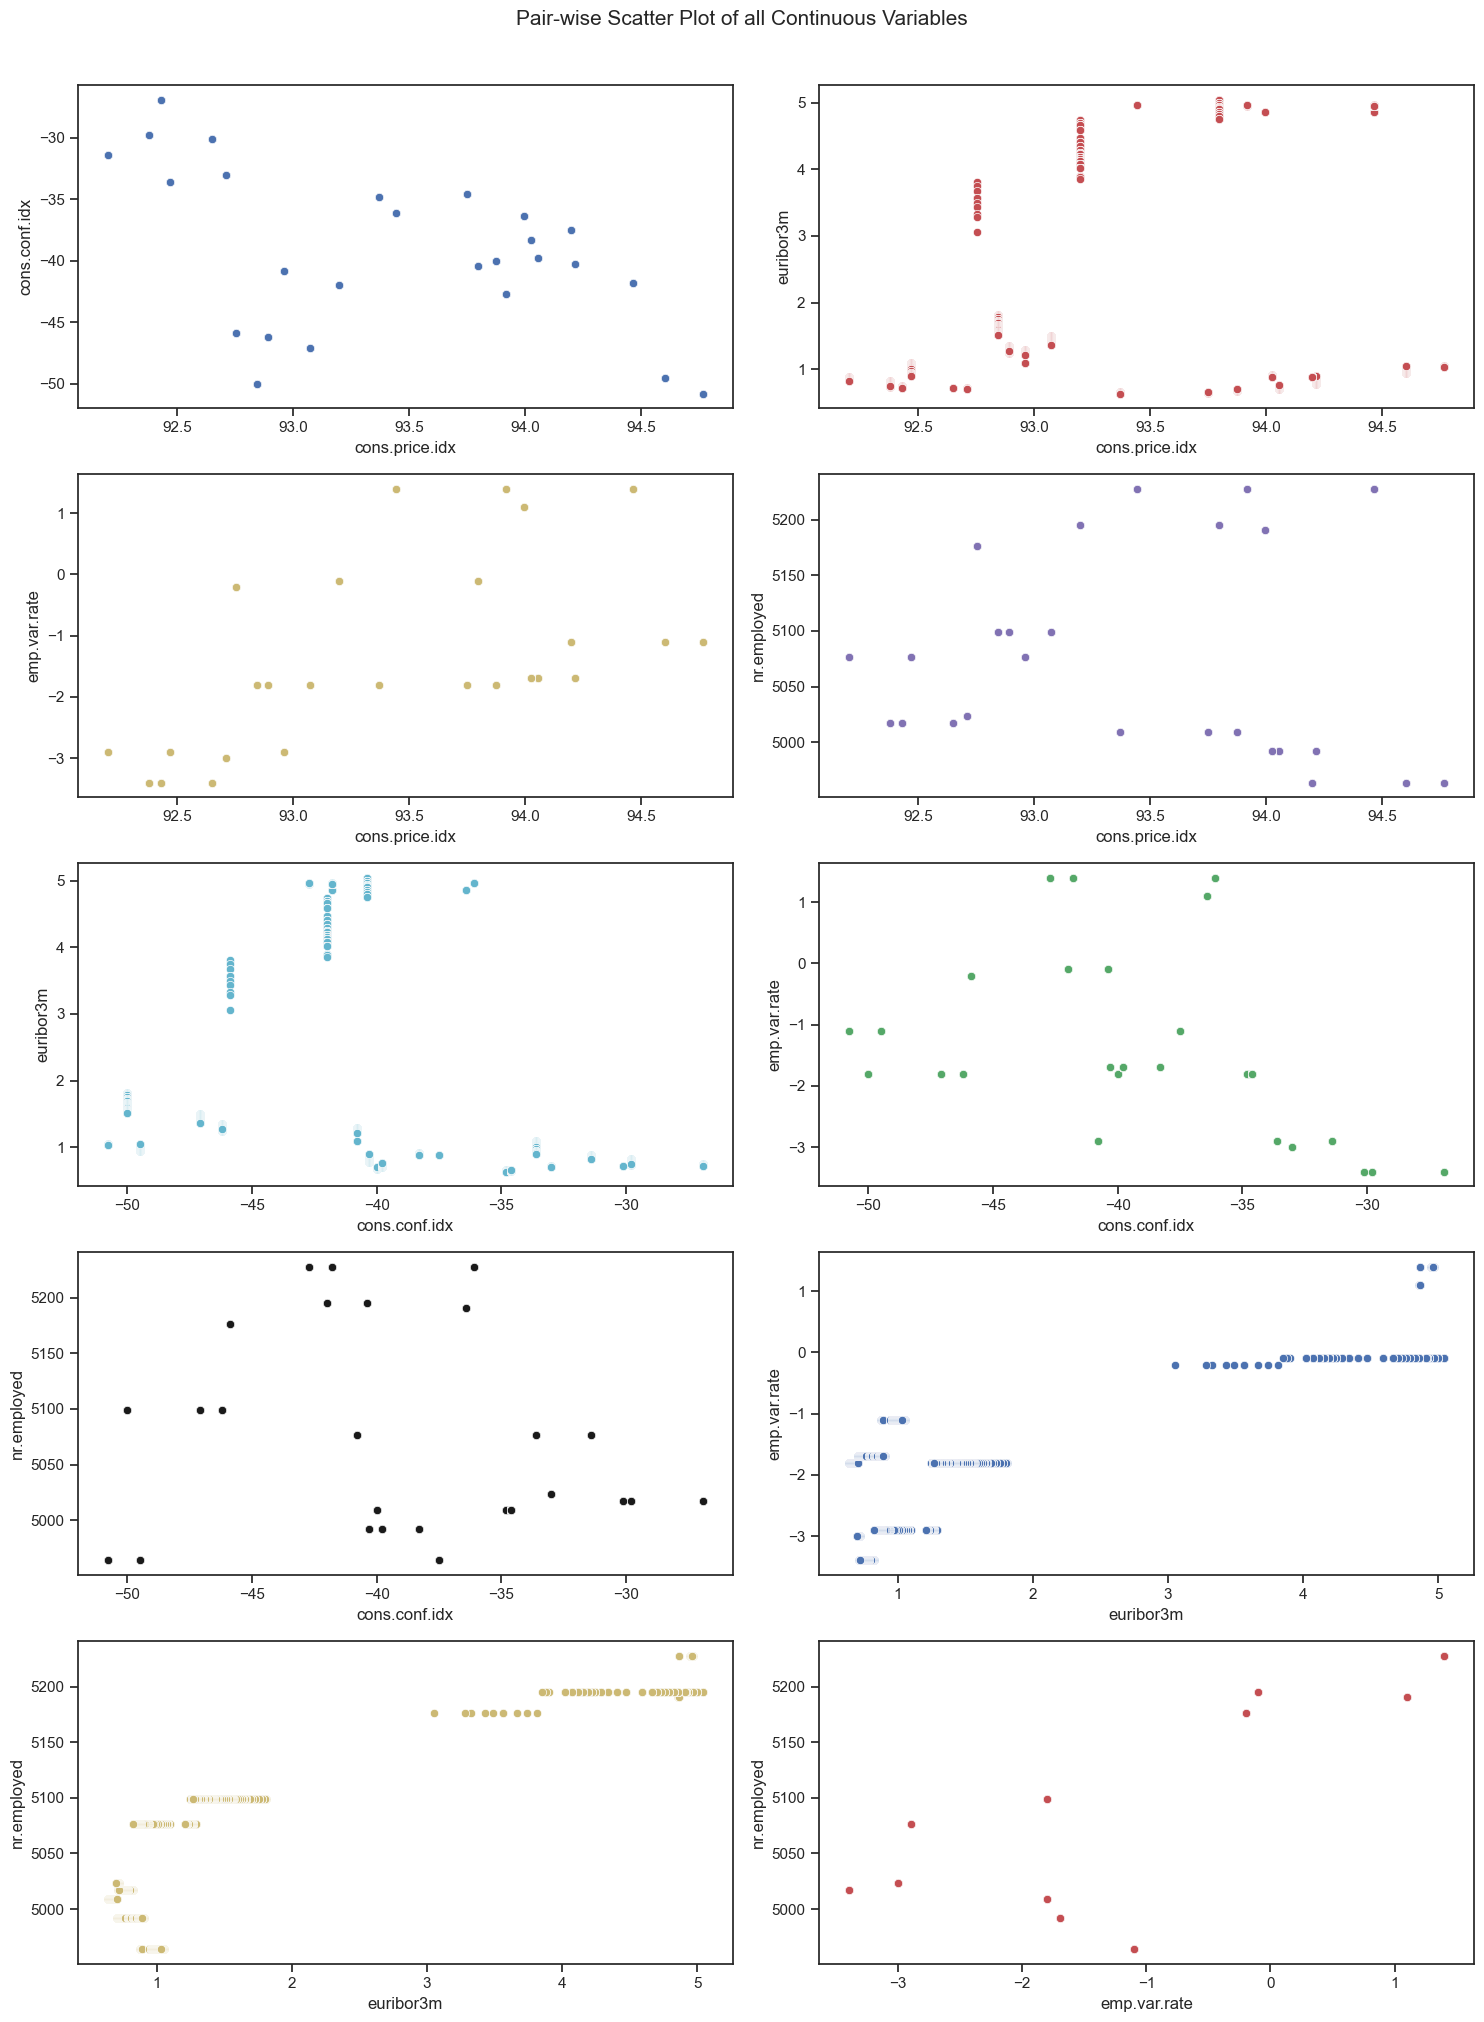

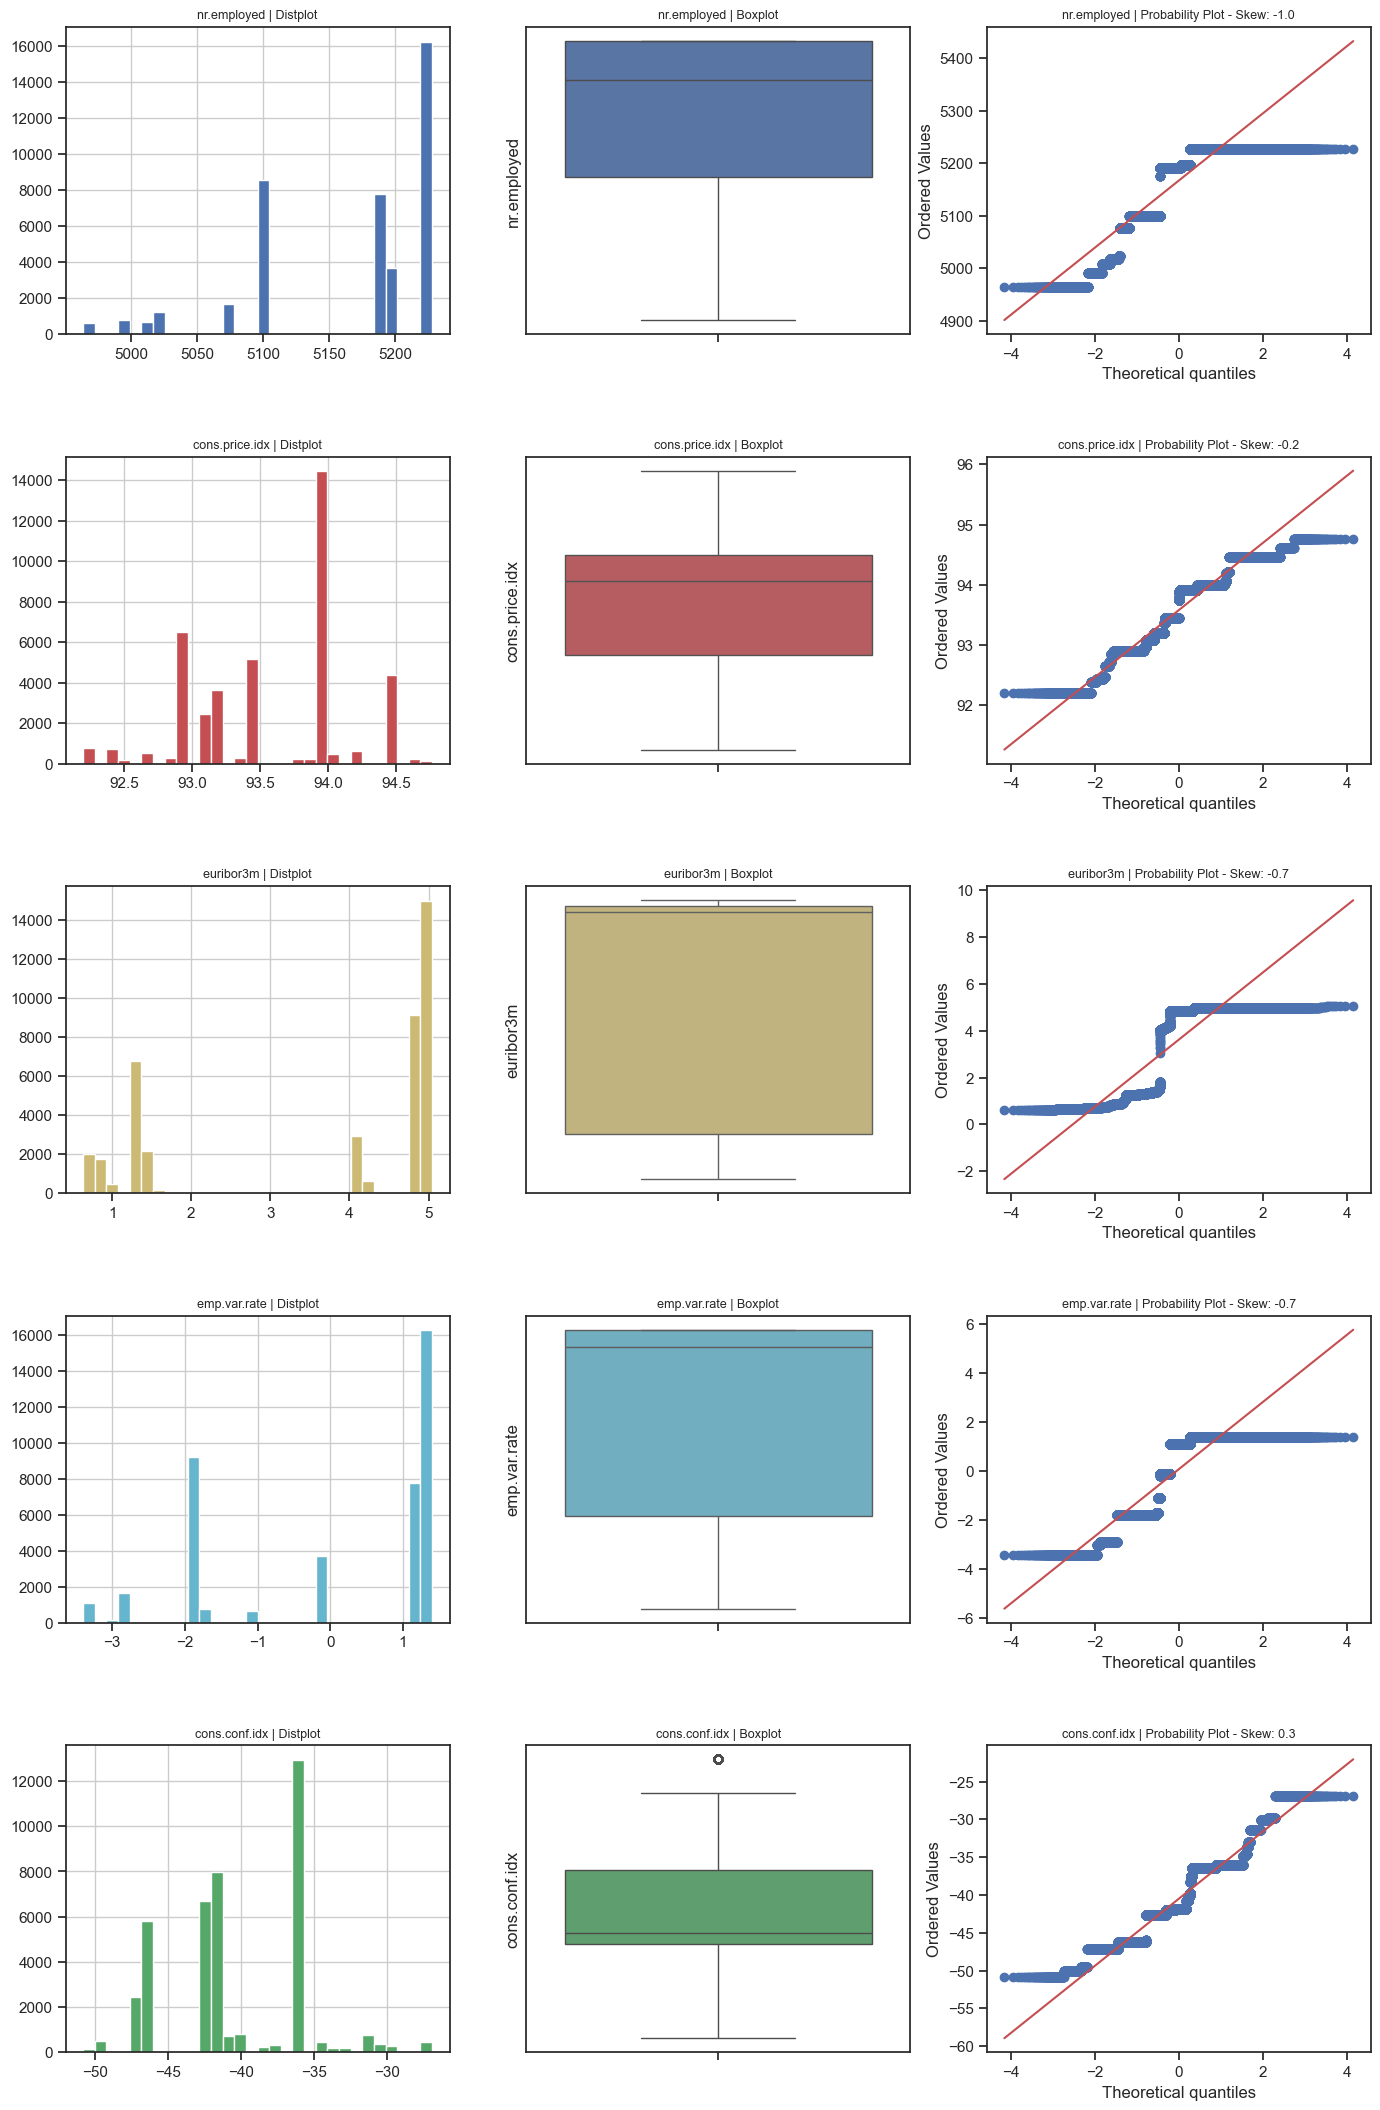

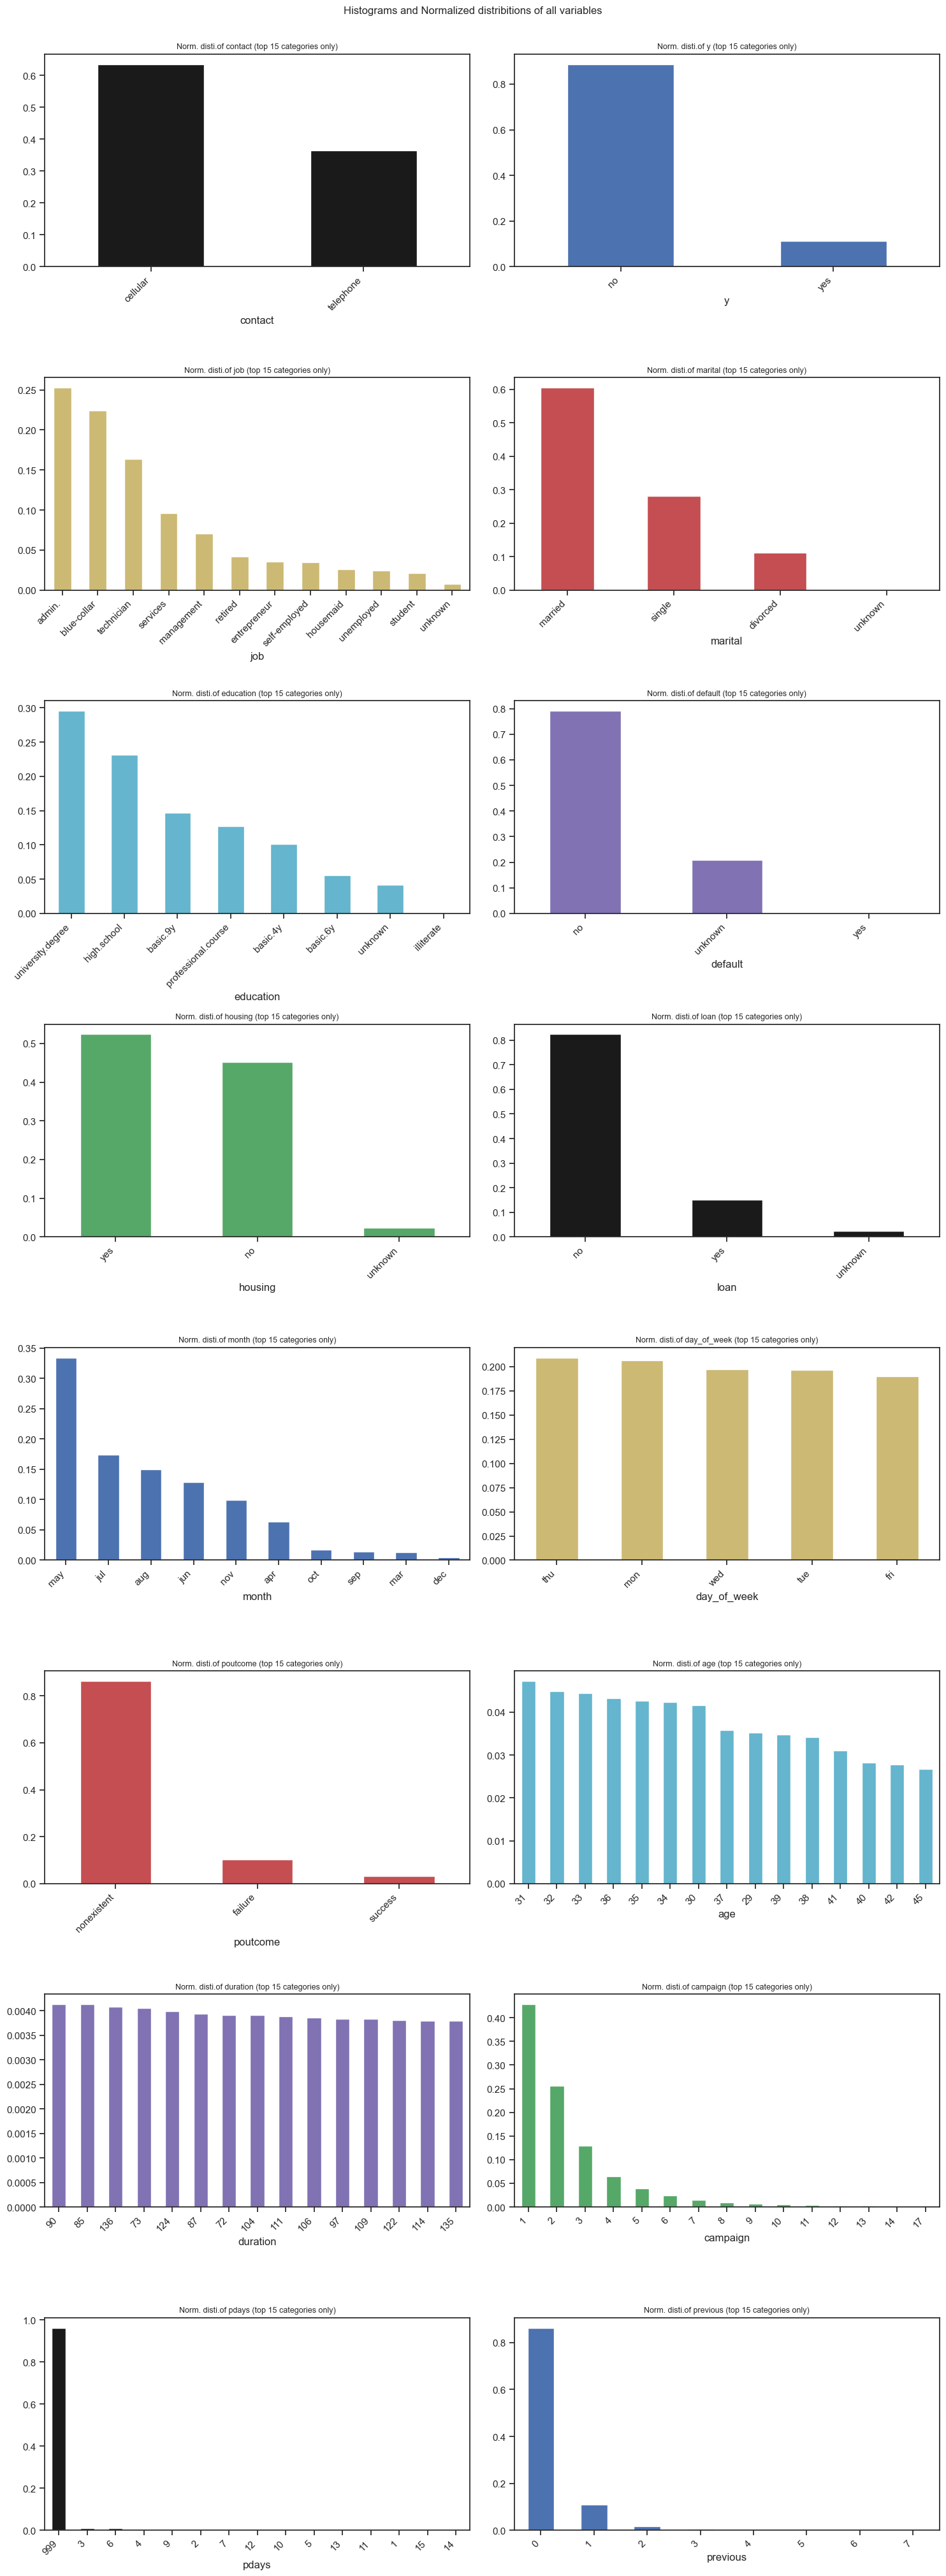

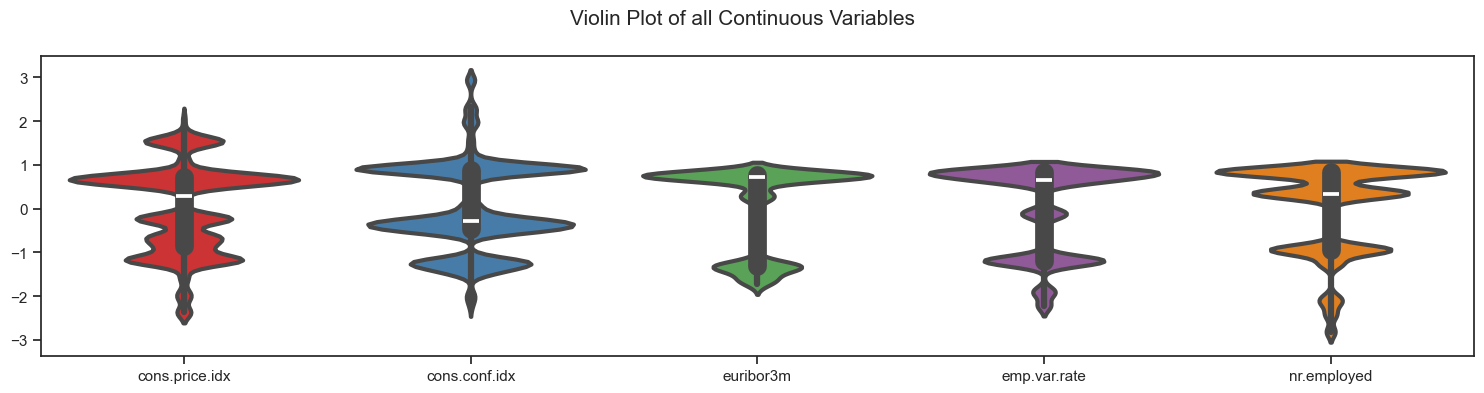

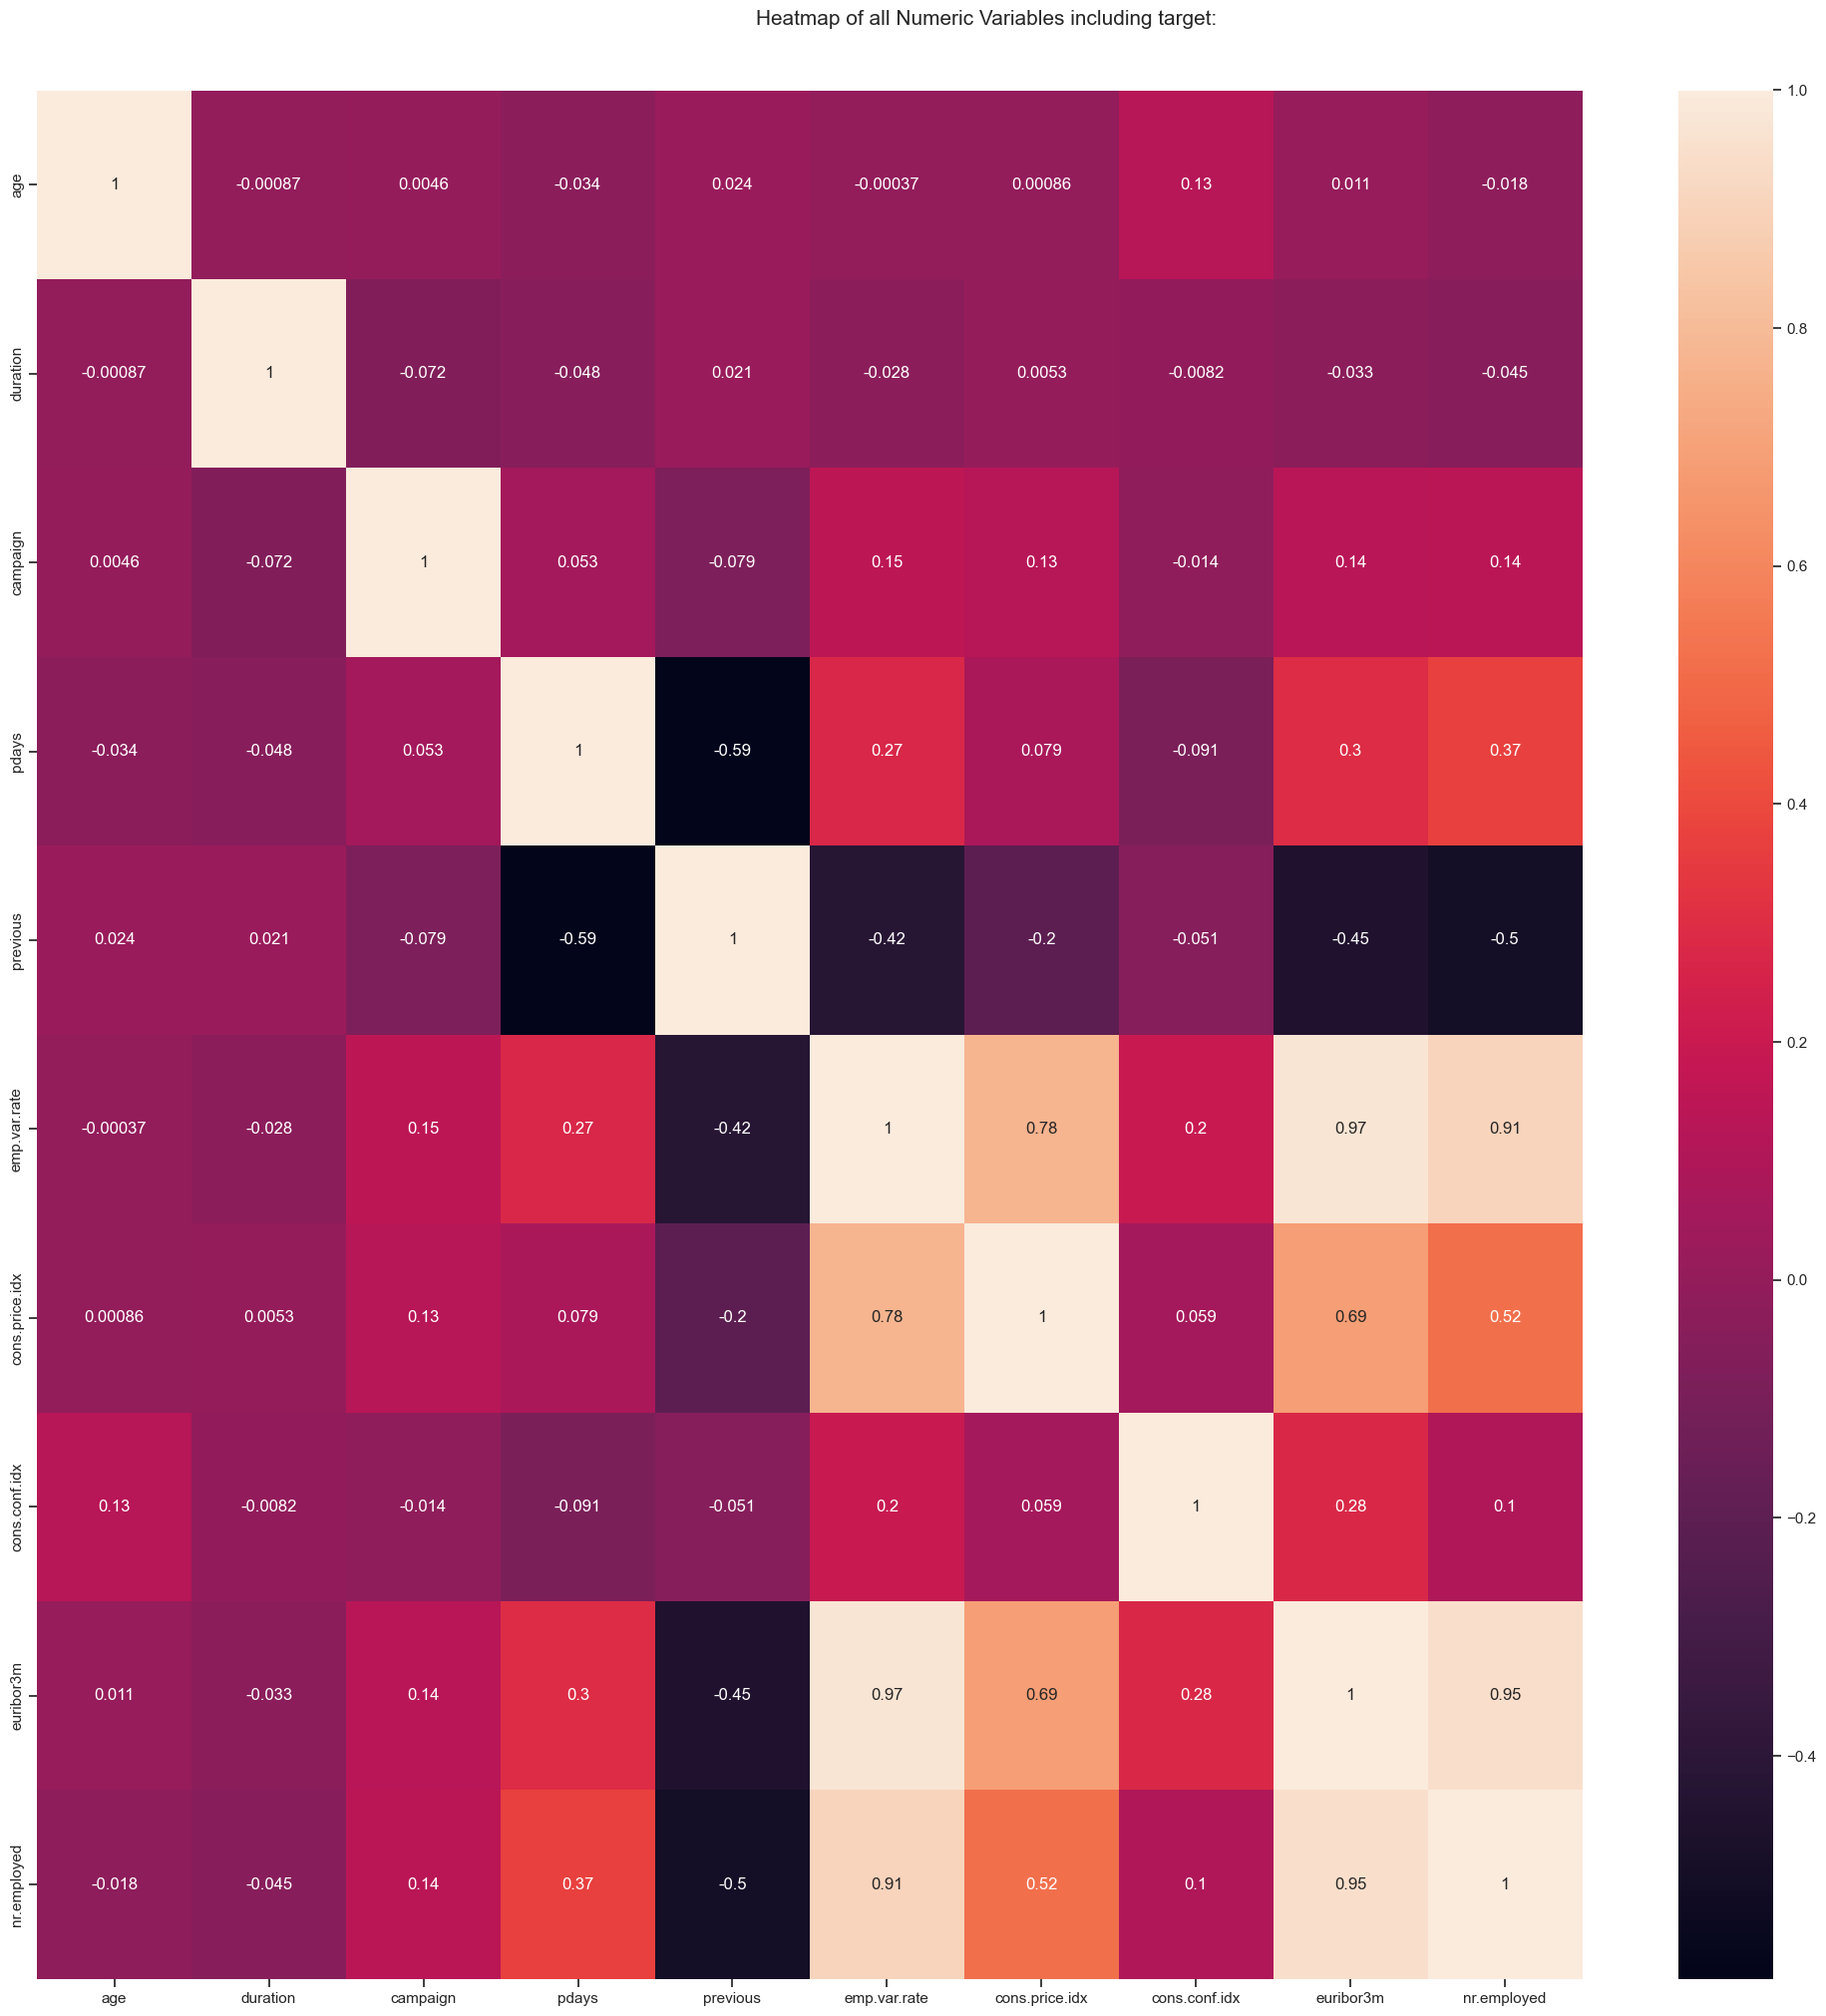

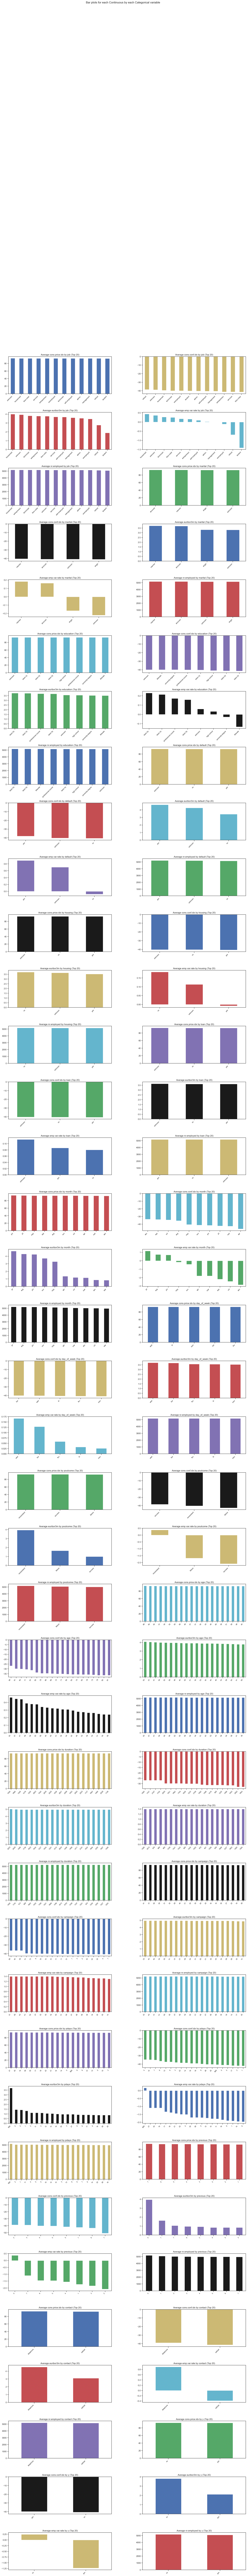

All Plots done
Time to run AutoViz = 14 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [6]:
#Utilize Autoviz package to assist with exploratory Data analysis
AV = AutoViz_Class()
%matplotlib inline
dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=df,
)

***Key points to note from the analysis***
* Age column has outliers that may need to be cleaned up
* Several contextual attributes in the feature set e.g interest rate, employment rate etc which may be highly correlated and some of them may need to be dropped
* No missing values (null values) in the data 
* 14 categorial features in the dataset. These features will need encoding. Some of the values in the category columns such as unknown, non existent will not help predict outcome and hence need to be removed from the dataset
* Highly imbalanaced dataset (89% failure). Need to determine if SMOTE technique of relebalancing can improve model accuracy



In [7]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

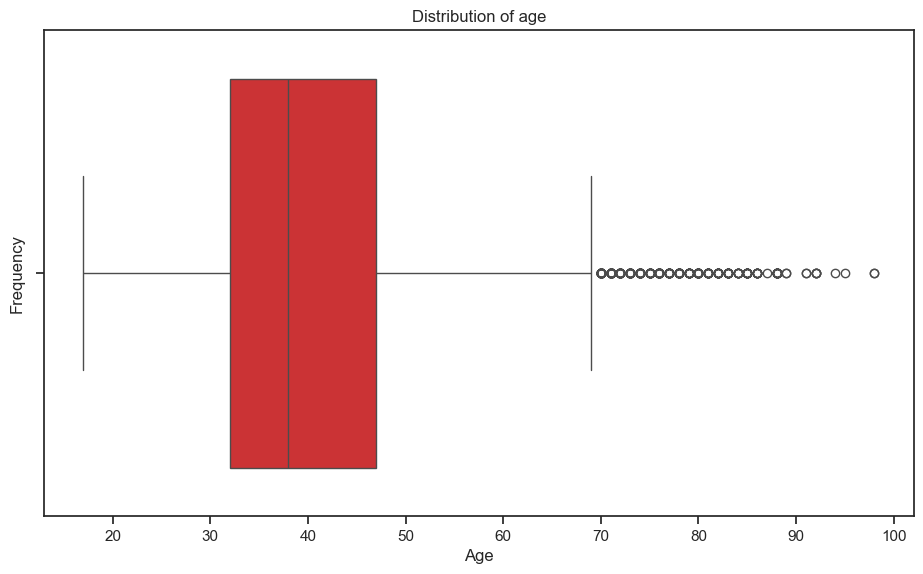

In [8]:
#Box plot for age feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

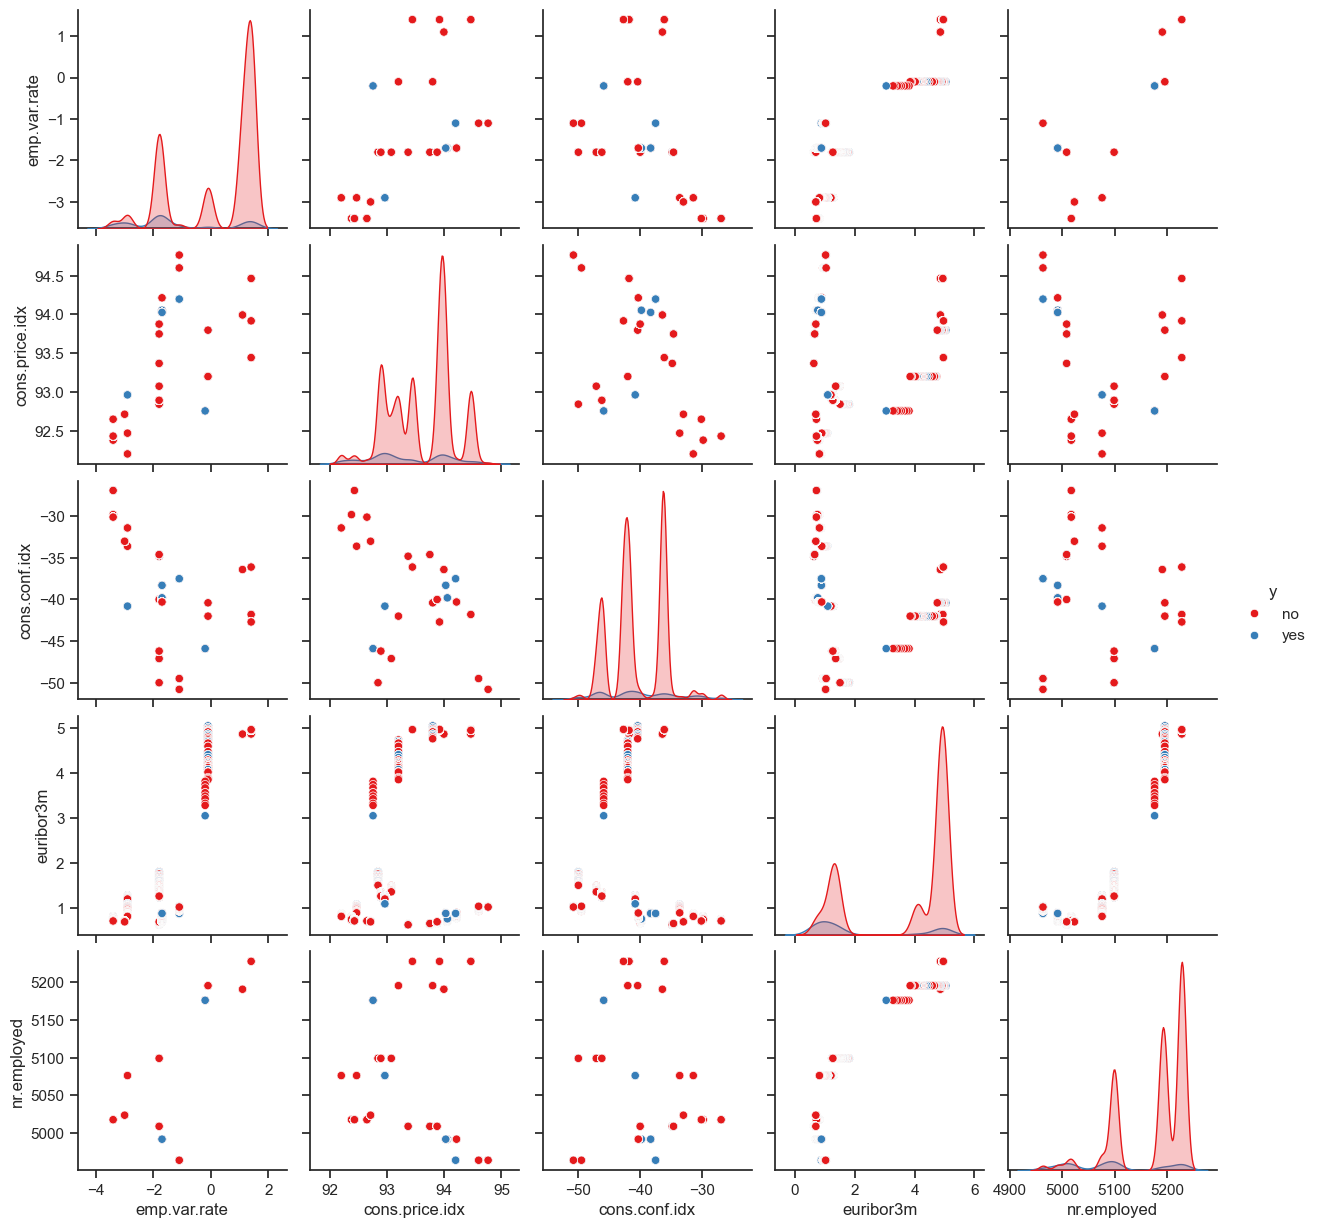

In [9]:
#pairplot of  contextual attributes to check correlation between features
sns.pairplot(df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']], hue ='y' )

In [10]:
#compute correlations of contextual attributes to check correlation between features
df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

***Scope of identified data clean up includes***
1. Age : Remove outliers in age
2. Job : Remove category unknow after one hot encoding
3. Martial: Remove category unknown after one hot encoding
4. Education : Remove category unknown after one hot encoding
5. Default : Remove category unknown after one hot encoding
6. Housing : Remove category unknown after one hot encoding
7. Loan : Remove category unknown after one hot encoding
8. poutcome : Remove category non existant after one hot encoding
9. Determine if one of feature from emp var rate and nr.employed need to dropped due to high correlation
10. Determine if one of price or conf index need to be dropped


In [11]:
# remove data with age > 70 (above upper fence 1.5 * Q3) - 467 rows dropped
df = df[df['age'] < 70]

In [12]:
#perform VIF analysis to eliminate highgly correelated features
X_vif = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
y_vif = df['y']
y_vif = y_vif.apply(lambda x: 1 if x == 'yes' else 0)

In [13]:
# VIF - measure of the multicollinearity in the independent features
def vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i != exog]
    X_vif, y_vif = data[not_exog], data[exog]

    r_squared = LinearRegression().fit(X_vif,y_vif).score(X_vif,y_vif)

    # calc the VIF
    vif = 1/(1-r_squared)
    vif_dict[exog] = vif

  return pd.DataFrame({"VIF":vif_dict})

In [14]:
vif(X_vif.columns, X_vif).sort_values(by = 'VIF', ascending = False)

,VIF
euribor3m,63.407968
emp.var.rate,32.550351
nr.employed,30.227868
cons.price.idx,6.189412
cons.conf.idx,2.617978


In [15]:
# drop emp.var.rate	because it has the highest VIF - do not want to drop euribor3m as interest rate has high predictive value for outcome
X_vif = X_vif.drop(columns = 'emp.var.rate')
vif(X_vif.columns, X_vif).sort_values(by = 'VIF', ascending = False)

,VIF
euribor3m,46.461462
nr.employed,29.805855
cons.price.idx,4.631932
cons.conf.idx,2.595251


In [16]:
# drop nr.employed	because it has the hig VIF - do not want to drop euribor3m as interest rate has high predictive value for outcome
X_vif = X_vif.drop(columns = 'nr.employed')
vif(X_vif.columns, X_vif).sort_values(by = 'VIF', ascending = False)

,VIF
euribor3m,2.187177
cons.price.idx,1.996412
cons.conf.idx,1.143762


In [17]:
X_vif.corr()

,cons.price.idx,cons.conf.idx,euribor3m
cons.price.idx,1.000000,0.082435,0.693263
cons.conf.idx,0.082435,1.000000,0.305651
euribor3m,0.693263,0.305651,1.000000


In [18]:
#post analysis in the temporary dataset, removing the cols from the original dataset df
df = df.drop(columns = ['emp.var.rate', 'nr.employed'])

In [19]:
#one encoding categorical values
cat_cols = cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome', 'contact']

col_transformer = make_column_transformer(
        (OneHotEncoder(), cat_cols),
        remainder='passthrough', verbose_feature_names_out=False)

df = pd.DataFrame(col_transformer.fit_transform(df), columns = col_transformer.get_feature_names_out())



In [20]:
#post encoding, removing values unknown and nonexistent within the columns. These values will not have impact on the outcome
df = df.drop(['job_unknown','marital_unknown','education_unknown','default_unknown','housing_unknown','loan_unknown','poutcome_nonexistent'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40719 entries, 0 to 40718
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   job_admin.                     40719 non-null  object
 1   job_blue-collar                40719 non-null  object
 2   job_entrepreneur               40719 non-null  object
 3   job_housemaid                  40719 non-null  object
 4   job_management                 40719 non-null  object
 5   job_retired                    40719 non-null  object
 6   job_self-employed              40719 non-null  object
 7   job_services                   40719 non-null  object
 8   job_student                    40719 non-null  object
 9   job_technician                 40719 non-null  object
 10  job_unemployed                 40719 non-null  object
 11  marital_divorced               40719 non-null  object
 12  marital_married                40719 non-null  object
 13  m

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [22]:
X = df.drop('y', axis = 1)
y= df['y']

In [23]:
#replace outcome string data with numerical 1 = yes, 0 - no
y=y.apply(lambda x: 1 if x == 'yes' else 0)

In [24]:
y.value_counts(normalize = 1)

y
0    0.891476
1    0.108524
Name: proportion, dtype: float64

In [25]:
#split into test and train datasets. Stratifying split given the dataset is highly imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 42, test_size=0.2, stratify = y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [26]:
#simple percentage split of output variable value shows 89% to 11% split. Hence any classifier model output needs to be better than 89%
y.value_counts(normalize = 1)

y
0    0.891476
1    0.108524
Name: proportion, dtype: float64

In [27]:
#validaing assumuption for model performance using a baseline model. classifier model output needs to be better than 89%
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.8914538310412574


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7260
           1       0.65      0.38      0.48       884

    accuracy                           0.91      8144
   macro avg       0.79      0.68      0.71      8144
weighted avg       0.90      0.91      0.90      8144



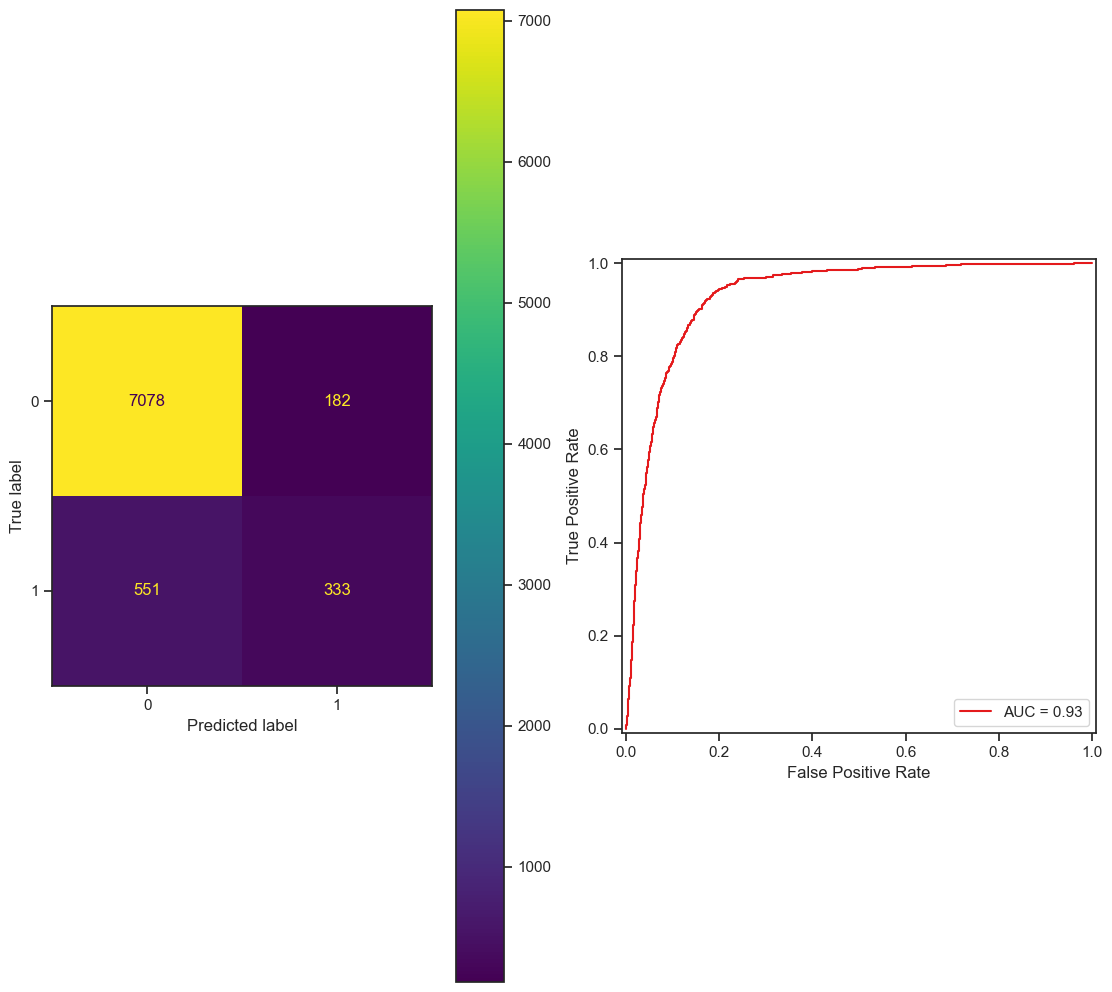

In [28]:
#Initial classifier model- logisticial regression with default constructor values. Also plotting the performance scores, 
#confusion matrix and AUC score

logmodel = LogisticRegression(max_iter = 1000)
start_time = time.time()
logmodel.fit(X_train, y_train)
log_train_time = time.time() - start_time
y_pred = logmodel.predict(X_test)
print(classification_report(y_test, y_pred))
log_train_score = accuracy_score(y_train, logmodel.predict(X_train))
log_test_score = accuracy_score(y_test, logmodel.predict(X_test))


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = logmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
log_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=log_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(log_roc_auc_value, 2)

### Problem 9: Score the Model

What is the accuracy of your model?

Weighted F1 score 0.9. Given the we are looking to classify on  highgly imbalanced dataset, AUC score appears to be most
appropriate performance metric to test performance. AUC score for logistical model is 0.93

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [29]:
#Setting up dataframe to record the performance of multiple classification models

res_dict = {'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVC'],
           'Train Time': [0, 0, 0,0 ],
            'Train Accuracy': [0, 0, 0, 0],
           'Test Accuracy': [0, 0, 0, 0]
           }


results_df = pd.DataFrame(res_dict).set_index('Model')

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7260
           1       0.48      0.47      0.47       884

    accuracy                           0.89      8144
   macro avg       0.71      0.70      0.71      8144
weighted avg       0.89      0.89      0.89      8144



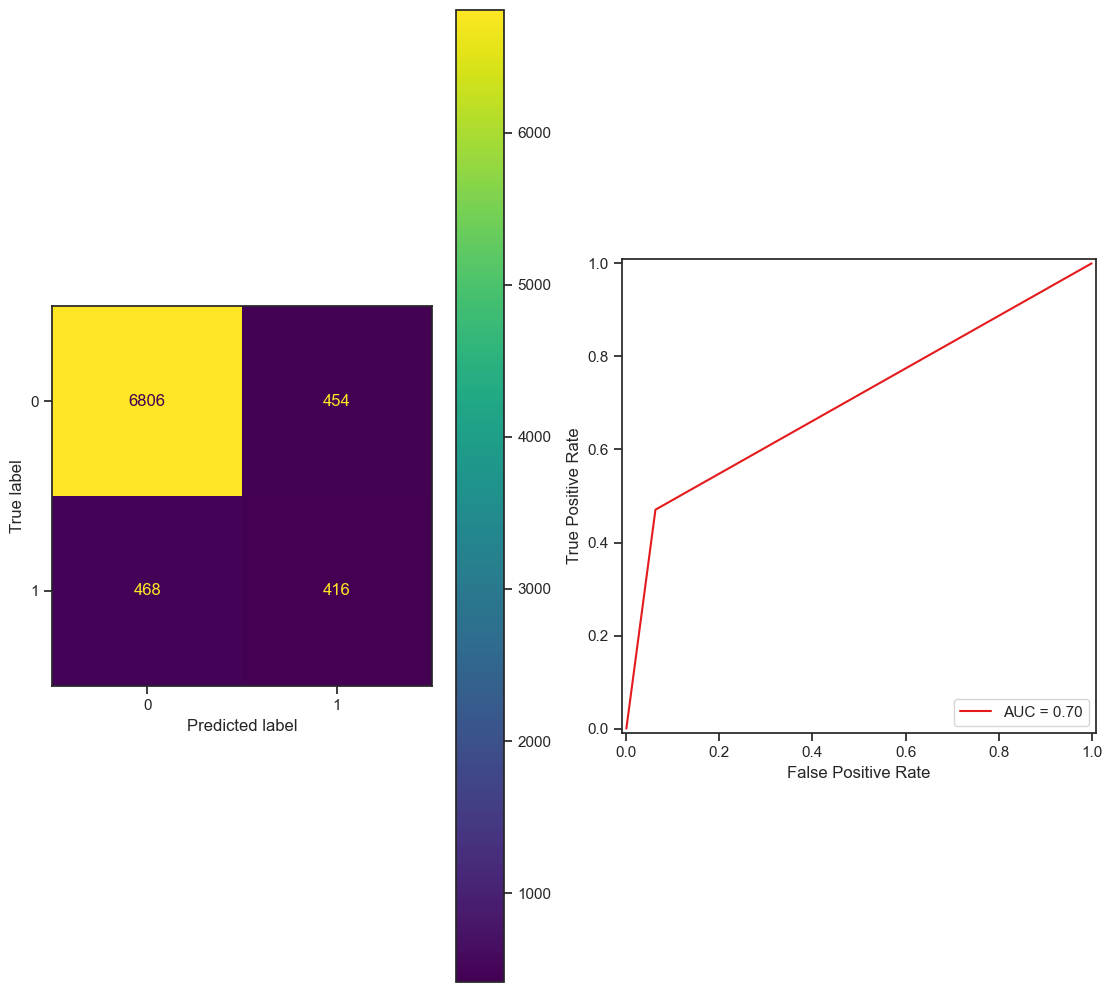

In [30]:
#Decision Tree with default constructor values. Also plotting the performance scores, confusion matrix and AUC score


dtreemodel = DecisionTreeClassifier()
start_time = time.time()
dtreemodel.fit(X_train, y_train)
dt_train_time = time.time() - start_time
y_pred = dtreemodel.predict(X_test)
print(classification_report(y_test, y_pred))
dt_train_score = accuracy_score(y_train, dtreemodel.predict(X_train))
dt_test_score = accuracy_score(y_test, dtreemodel.predict(X_test))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = dtreemodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
dt_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=dt_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(dt_roc_auc_value, 2)




              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7260
           1       0.60      0.42      0.49       884

    accuracy                           0.91      8144
   macro avg       0.77      0.69      0.72      8144
weighted avg       0.90      0.91      0.90      8144



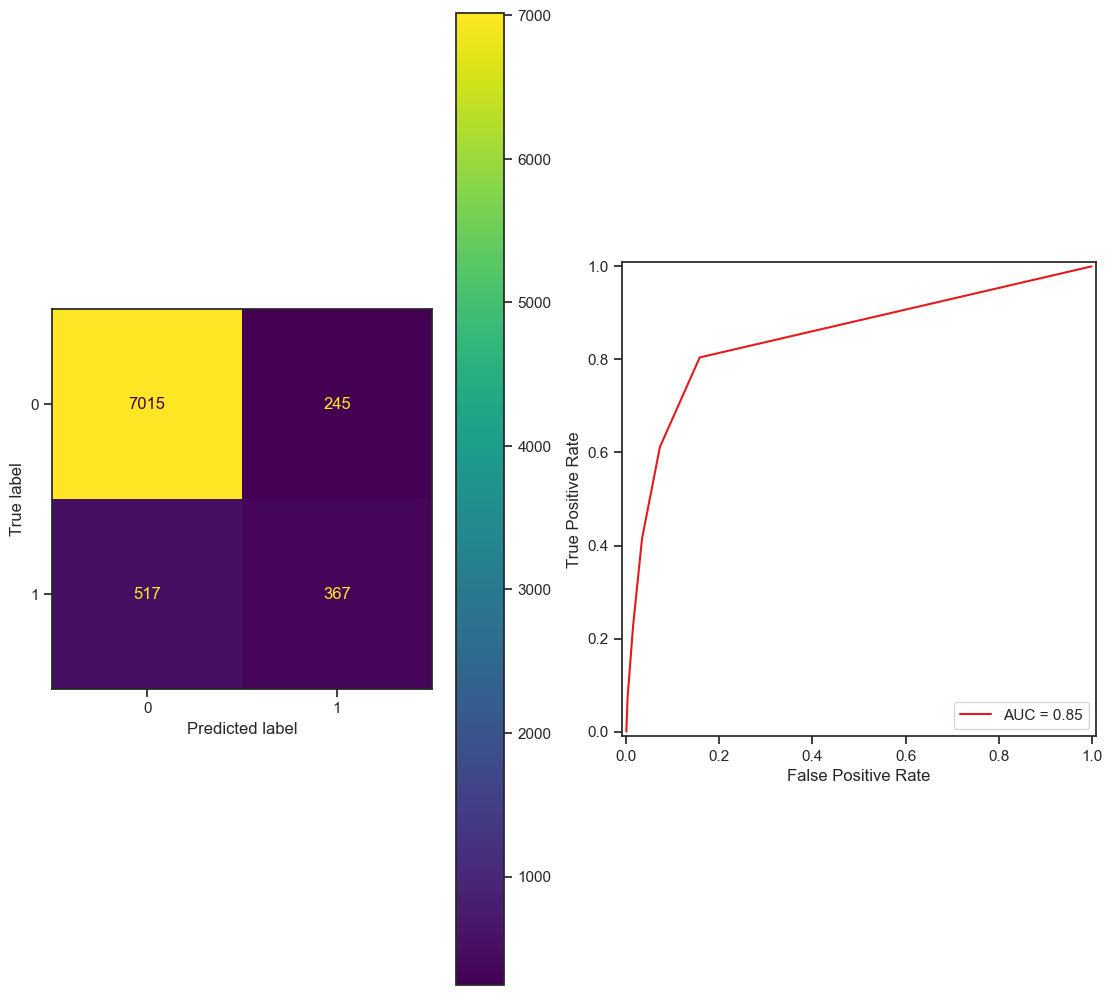

In [31]:
#KNN model with default constructor values. Also plotting the performance scores, confusion matrix and AUC score

knnmodel = KNeighborsClassifier()
start_time = time.time()
knnmodel.fit(X_train, y_train)
knn_train_time = time.time() - start_time
y_pred = knnmodel.predict(X_test)
print(classification_report(y_test, y_pred))
knn_train_score = accuracy_score(y_train, knnmodel.predict(X_train))
knn_test_score = accuracy_score(y_test, knnmodel.predict(X_test))


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = knnmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
knn_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=knn_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(knn_roc_auc_value, 2)




              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7260
           1       0.66      0.28      0.39       884

    accuracy                           0.91      8144
   macro avg       0.79      0.63      0.67      8144
weighted avg       0.89      0.91      0.89      8144



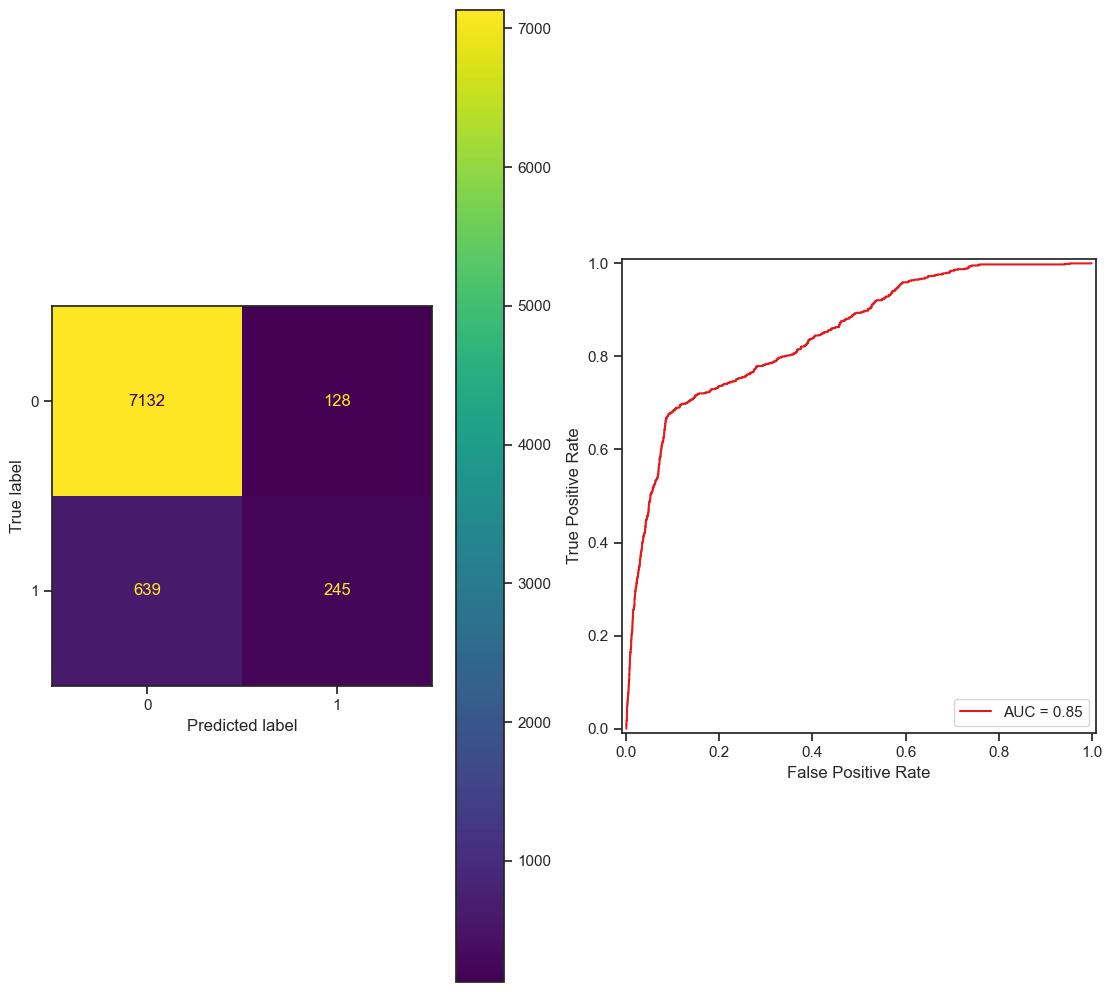

In [32]:
#SVM model  with default constructor values. Also plotting the performance scores, confusion matrix and AUC score

svcmodel = SVC()
start_time = time.time()
svcmodel.fit(X_train, y_train)
svc_train_time = time.time() - start_time
y_pred = svcmodel.predict(X_test)
print(classification_report(y_test, y_pred))
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
svc_train_score = accuracy_score(y_train, svcmodel.predict(X_train))
svc_test_score = accuracy_score(y_test, svcmodel.predict(X_test))


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = svcmodel.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
svm_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=svm_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(svm_roc_auc_value, 2)

In [33]:
results_df.loc[:, 'Train Time'] = [log_train_time, dt_train_time,knn_train_time,svc_train_time]
results_df.loc[:, 'Train Accuracy'] = [log_train_score, dt_train_score,knn_train_score,svc_train_score]
results_df.loc[:, 'Test Accuracy'] = [log_test_score, dt_test_score,knn_test_score,svc_test_score]

#printing the summary of model performance accross metrics for all the classification models tested so far - 
# metrics considered time to train, accuracy on training and accuracy on  testing data
print(results_df)


                     Train Time  Train Accuracy  Test Accuracy
Model                                                         
Logistic Regression    3.135955     0.913584       0.909995   
Decision Tree          0.217933     1.000000       0.886788   
KNN                    0.072949     0.928810       0.906434   
SVC                   13.613502     0.908273       0.905820   


***Based on the intial modelling, logistical and SVM models seem to give highest accuracy but logistical regression took far less time***

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

***Scope of model improvements include***
1. Decide on the performance metric to use
2. Determine best model with grid search
3. Use SMOTE technique to adjust for imbalance in the dataset

In [34]:
# 1. choosing AUC as the performance metric to optimize (imbalanced dataset). 
results_df.loc[:, 'Test AUC Score'] = [log_roc_auc_value, dt_roc_auc_value,knn_roc_auc_value,svm_roc_auc_value]
print(results_df)

                     Train Time  Train Accuracy  Test Accuracy  Test AUC Score
Model                                                                         
Logistic Regression    3.135955     0.913584       0.909995        0.931577   
Decision Tree          0.217933     1.000000       0.886788        0.704027   
KNN                    0.072949     0.928810       0.906434        0.848243   
SVC                   13.613502     0.908273       0.905820        0.847713   


Based on the AUC score, logistical model seem to give highest accuracy and lowest fitting time. 

4. Determine best model with grid search

In [35]:
#2. Grid search to identify the best Logistical Regression hyperparamters 

param_grid = {
    'log__C': [100, 10, 1.0, 0.1, 0.01], 
    'log__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'log__penalty': ['None', 'l1', 'l2', 'elasticnet']
}

log_pipe = Pipeline([('scale', StandardScaler()), ('log', LogisticRegression(max_iter = 1000))])
log_grid = GridSearchCV(log_pipe, param_grid, cv=5,verbose=3,
                   scoring = 'roc_auc')
log_grid.fit(X_train, y_train)
model= log_grid.best_estimator_
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
best_log_test_auc_score = skl_auc(fpr, tpr)
print("Best logistical regression model : %f using %s" % (best_log_test_auc_score, log_grid.best_params_))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END log__C=100, log__penalty=None, log__solver=newton-cg;, score=nan total time=   0.2s
[CV 2/5] END log__C=100, log__penalty=None, log__solver=newton-cg;, score=nan total time=   0.1s
[CV 3/5] END log__C=100, log__penalty=None, log__solver=newton-cg;, score=nan total time=   0.1s
[CV 4/5] END log__C=100, log__penalty=None, log__solver=newton-cg;, score=nan total time=   0.1s
[CV 5/5] END log__C=100, log__penalty=None, log__solver=newton-cg;, score=nan total time=   0.1s
[CV 1/5] END log__C=100, log__penalty=None, log__solver=lbfgs;, score=nan total time=   0.1s
[CV 2/5] END log__C=100, log__penalty=None, log__solver=lbfgs;, score=nan total time=   0.1s
[CV 3/5] END log__C=100, log__penalty=None, log__solver=lbfgs;, score=nan total time=   0.1s
[CV 4/5] END log__C=100, log__penalty=None, log__solver=lbfgs;, score=nan total time=   0.1s
[CV 5/5] END log__C=100, log__penalty=None, log__solver=lbfgs;, score=nan total 

In [36]:
# #Grid search to identify the best KNN hyperparamters
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_grid = GridSearchCV(knn_pipe, param_grid = {'knn__n_neighbors': range(1, 30, 2)},verbose=3,
                   scoring = 'roc_auc')
knn_grid.fit(X_train, y_train)
model= knn_grid.best_estimator_
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
best_knn_test_auc_score = skl_auc(fpr, tpr)
print("Best knn model score: %f using %s" % (best_knn_test_auc_score, knn_grid.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ................knn__n_neighbors=1;, score=0.658 total time=   0.6s
[CV 2/5] END ................knn__n_neighbors=1;, score=0.638 total time=   0.5s
[CV 3/5] END ................knn__n_neighbors=1;, score=0.647 total time=   0.5s
[CV 4/5] END ................knn__n_neighbors=1;, score=0.650 total time=   0.5s
[CV 5/5] END ................knn__n_neighbors=1;, score=0.649 total time=   0.5s
[CV 1/5] END ................knn__n_neighbors=3;, score=0.762 total time=   0.5s
[CV 2/5] END ................knn__n_neighbors=3;, score=0.740 total time=   0.6s
[CV 3/5] END ................knn__n_neighbors=3;, score=0.728 total time=   0.6s
[CV 4/5] END ................knn__n_neighbors=3;, score=0.744 total time=   0.5s
[CV 5/5] END ................knn__n_neighbors=3;, score=0.740 total time=   0.5s
[CV 1/5] END ................knn__n_neighbors=5;, score=0.793 total time=   0.6s
[CV 2/5] END ................knn__n_neighbors=5;

In [37]:
# #Grid search to identify the best Decision tree hyperparamters
params = {'dtree__min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'dtree__max_depth': [2, 5, 10],
         'dtree__min_samples_split': [0.1, 0.2, 0.05]}

dtree_pipe = Pipeline([('scale', StandardScaler()), ('dtree', DecisionTreeClassifier(random_state = 42))])
dtree_grid = GridSearchCV(dtree_pipe, params, cv=5,verbose=3,
                   scoring = 'roc_auc')
dtree_grid.fit(X_train, y_train)
model= dtree_grid.best_estimator_
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
best_dt_test_auc_score = skl_auc(fpr, tpr)
print("Best Decision tree model score : %f using %s" % (best_dt_test_auc_score, dtree_grid.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END dtree__max_depth=2, dtree__min_impurity_decrease=0.01, dtree__min_samples_split=0.1;, score=0.821 total time=   0.2s
[CV 2/5] END dtree__max_depth=2, dtree__min_impurity_decrease=0.01, dtree__min_samples_split=0.1;, score=0.808 total time=   0.2s
[CV 3/5] END dtree__max_depth=2, dtree__min_impurity_decrease=0.01, dtree__min_samples_split=0.1;, score=0.820 total time=   0.2s
[CV 4/5] END dtree__max_depth=2, dtree__min_impurity_decrease=0.01, dtree__min_samples_split=0.1;, score=0.811 total time=   0.2s
[CV 5/5] END dtree__max_depth=2, dtree__min_impurity_decrease=0.01, dtree__min_samples_split=0.1;, score=0.829 total time=   0.2s
[CV 1/5] END dtree__max_depth=2, dtree__min_impurity_decrease=0.01, dtree__min_samples_split=0.2;, score=0.821 total time=   0.1s
[CV 2/5] END dtree__max_depth=2, dtree__min_impurity_decrease=0.01, dtree__min_samples_split=0.2;, score=0.808 total time=   0.1s
[CV 3/5] END dtree__max_dept

In [38]:
# #Grid search to identify the best SVM model hyperparamters
params = {'svc__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'svc__gamma': [0.01, 0.1, 1.0],}

svn_pipe = Pipeline([('scale', StandardScaler()),('svc', SVC())])
svn_grid = GridSearchCV(svn_pipe, params, verbose=3,
                   scoring = 'roc_auc')
svn_grid.fit(X_train, y_train)
model= svn_grid.best_estimator_
y_score = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
best_svm_test_auc_score = skl_auc(fpr, tpr)
print("Best SVM model score: %f using %s" % (best_svm_test_auc_score, svn_grid.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.937 total time=  12.5s
[CV 2/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.932 total time=  12.2s
[CV 3/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.938 total time=  12.0s
[CV 4/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.933 total time=  11.8s
[CV 5/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.934 total time=  11.9s
[CV 1/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.909 total time=   7.5s
[CV 2/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.900 total time=   7.5s
[CV 3/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.896 total time=   7.2s
[CV 4/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.893 total time=   7.1s
[CV 5/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.908 total time=   7.2s
[CV 1/5] END svc__gamma=0.01, svc__kernel=linear;, score=0.935 total time=  21.4s
[CV 2/5] END svc__gamma=0.01, svc__kernel=linea

Overall SVM seems to be the best model  : score: 0.938163 using {'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [39]:
#3. Validate if SMOTENC adjusted balanced data improves model scoring

In [40]:
#reading the source data to balance the data using smote. All data cleansing and feature engineering performed on the balanced data
from imblearn.over_sampling import SMOTENC
df_for_SMOTE = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df_for_SMOTE = df_for_SMOTE[df_for_SMOTE['age'] < 70]
df_for_SMOTE = df_for_SMOTE.drop(columns = ['emp.var.rate', 'nr.employed'])
X_SMOTE = df_for_SMOTE.drop('y', axis = 1)
y_SMOTE= df_for_SMOTE['y']
y_SMOTE=y_SMOTE.apply(lambda x: 1 if x == 'yes' else 0)
y_SMOTE.value_counts(normalize = 1)

y
0    0.891476
1    0.108524
Name: proportion, dtype: float64

In [41]:
sm = SMOTENC(random_state=42, categorical_features=cat_cols)
X_bal, y_bal = sm.fit_resample(X_SMOTE, y_SMOTE)

In [42]:
col_transformer_smote = make_column_transformer(
        (OneHotEncoder(), cat_cols),
        remainder='passthrough', verbose_feature_names_out=False)
print(col_transformer_smote.fit_transform(X_bal).shape)
print(col_transformer_smote.get_feature_names_out().shape)
X_bal = pd.DataFrame(col_transformer_smote.fit_transform(X_bal).toarray(), columns = col_transformer_smote.get_feature_names_out())


(72600, 61)
(61,)


In [43]:
X_bal = X_bal.drop(['job_unknown','marital_unknown','education_unknown','default_unknown','housing_unknown','loan_unknown','poutcome_nonexistent'], axis=1)

In [44]:
X_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72600 entries, 0 to 72599
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job_admin.                     72600 non-null  float64
 1   job_blue-collar                72600 non-null  float64
 2   job_entrepreneur               72600 non-null  float64
 3   job_housemaid                  72600 non-null  float64
 4   job_management                 72600 non-null  float64
 5   job_retired                    72600 non-null  float64
 6   job_self-employed              72600 non-null  float64
 7   job_services                   72600 non-null  float64
 8   job_student                    72600 non-null  float64
 9   job_technician                 72600 non-null  float64
 10  job_unemployed                 72600 non-null  float64
 11  marital_divorced               72600 non-null  float64
 12  marital_married                72600 non-null 

In [45]:
y_bal.value_counts(normalize = 1)

y
0    0.5
1    0.5
Name: proportion, dtype: float64

In [46]:
#Splitting SMOTE balanced data
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, 
                                                   random_state = 42, test_size=0.2, stratify = y_bal)

              precision    recall  f1-score   support

           0       0.76      0.85      0.81      7260
           1       0.83      0.73      0.78      7260

    accuracy                           0.79     14520
   macro avg       0.80      0.79      0.79     14520
weighted avg       0.80      0.79      0.79     14520



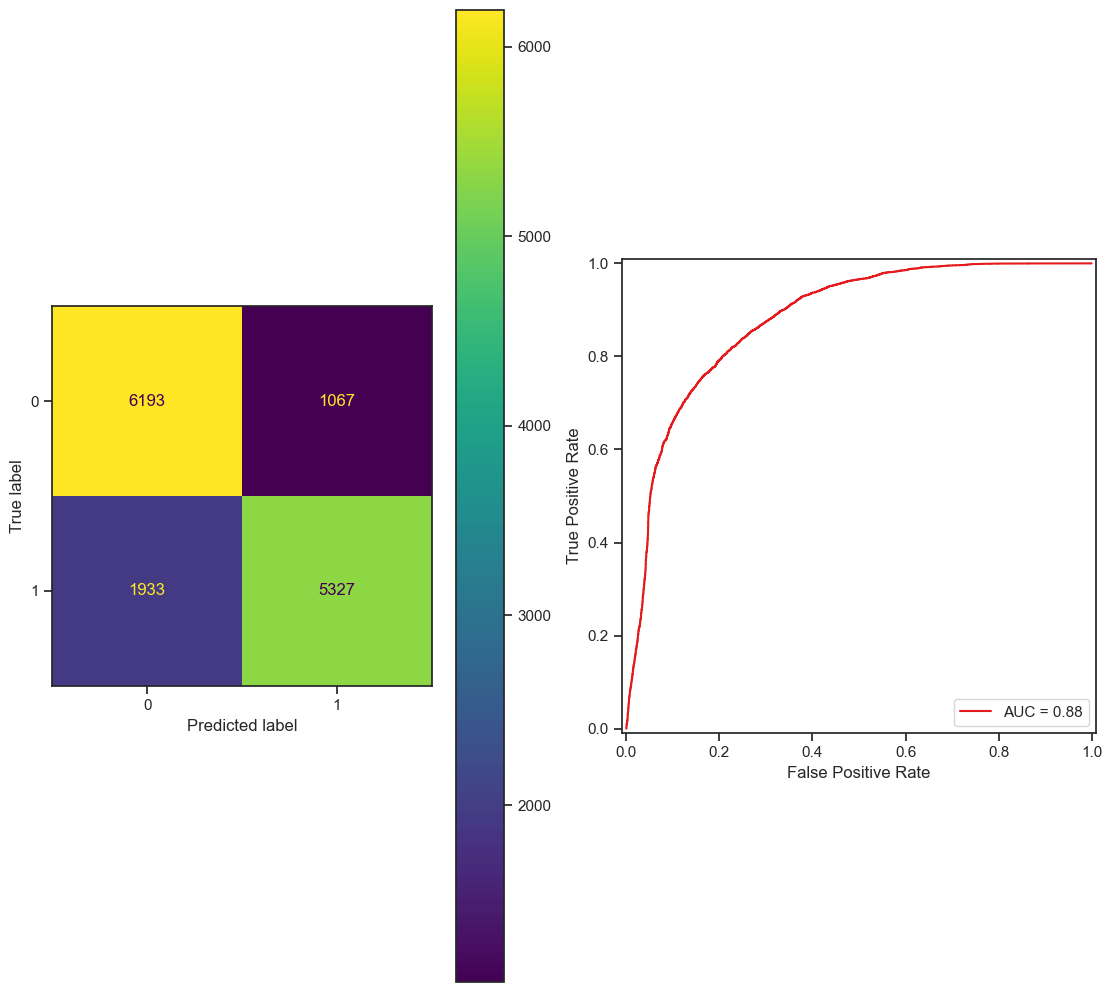

In [47]:
#Fitting SVM model on SMOTE balanced dataset

svcmodel = SVC()
svcmodel.fit(X_bal_train, y_bal_train)
y_bal_pred = svcmodel.predict(X_bal_test)
print(classification_report(y_bal_test, y_bal_pred))
svc_train_score = accuracy_score(y_bal_train, svcmodel.predict(X_bal_train))
svc_test_score = accuracy_score(y_bal_test, svcmodel.predict(X_bal_test))


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_bal_test, y_bal_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_bal_score = svcmodel.decision_function(X_bal_test)
fpr, tpr, thresholds = roc_curve(y_bal_test, y_bal_score, pos_label=1)
svm_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=svm_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(svm_roc_auc_value, 2)

SMOTE improves the AUC score of the model (0.85->0.88). Gridsearch to find the best parameters the SVM model on the balanced dataset

In [48]:
#Rerun gridsearch to identify the optimal hyperparameters for the SVM model
params = {'svc__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'svc__gamma': [0.01, 0.1],}

svn_pipe = Pipeline([('scale', StandardScaler()),('svc', SVC())])
svn_grid = GridSearchCV(svn_pipe, params, verbose=3,
                   scoring = 'roc_auc')
svn_grid.fit(X_bal_train, y_bal_train)
model= svn_grid.best_estimator_
y_bal_score = model.decision_function(X_bal_test)
fpr, tpr, thresholds = roc_curve(y_bal_test, y_bal_score, pos_label=1)
best_svm_test_auc_score = skl_auc(fpr, tpr)
print("Best SVM model score: %f using %s" % (best_svm_test_auc_score, svn_grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.971 total time=  57.7s
[CV 2/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.970 total time=  56.5s
[CV 3/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.970 total time=  55.1s
[CV 4/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.969 total time=  56.6s
[CV 5/5] END ..svc__gamma=0.01, svc__kernel=rbf;, score=0.970 total time=  56.5s
[CV 1/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.963 total time=  58.9s
[CV 2/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.965 total time= 1.0min
[CV 3/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.964 total time=  57.1s
[CV 4/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.962 total time=  54.5s
[CV 5/5] END .svc__gamma=0.01, svc__kernel=poly;, score=0.963 total time=  56.1s
[CV 1/5] END svc__gamma=0.01, svc__kernel=linear;, score=0.957 total time= 2.1min
[CV 2/5] END svc__gamma=0.01, svc__kernel=linear

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7260
           1       0.93      0.92      0.93      7260

    accuracy                           0.93     14520
   macro avg       0.93      0.93      0.93     14520
weighted avg       0.93      0.93      0.93     14520



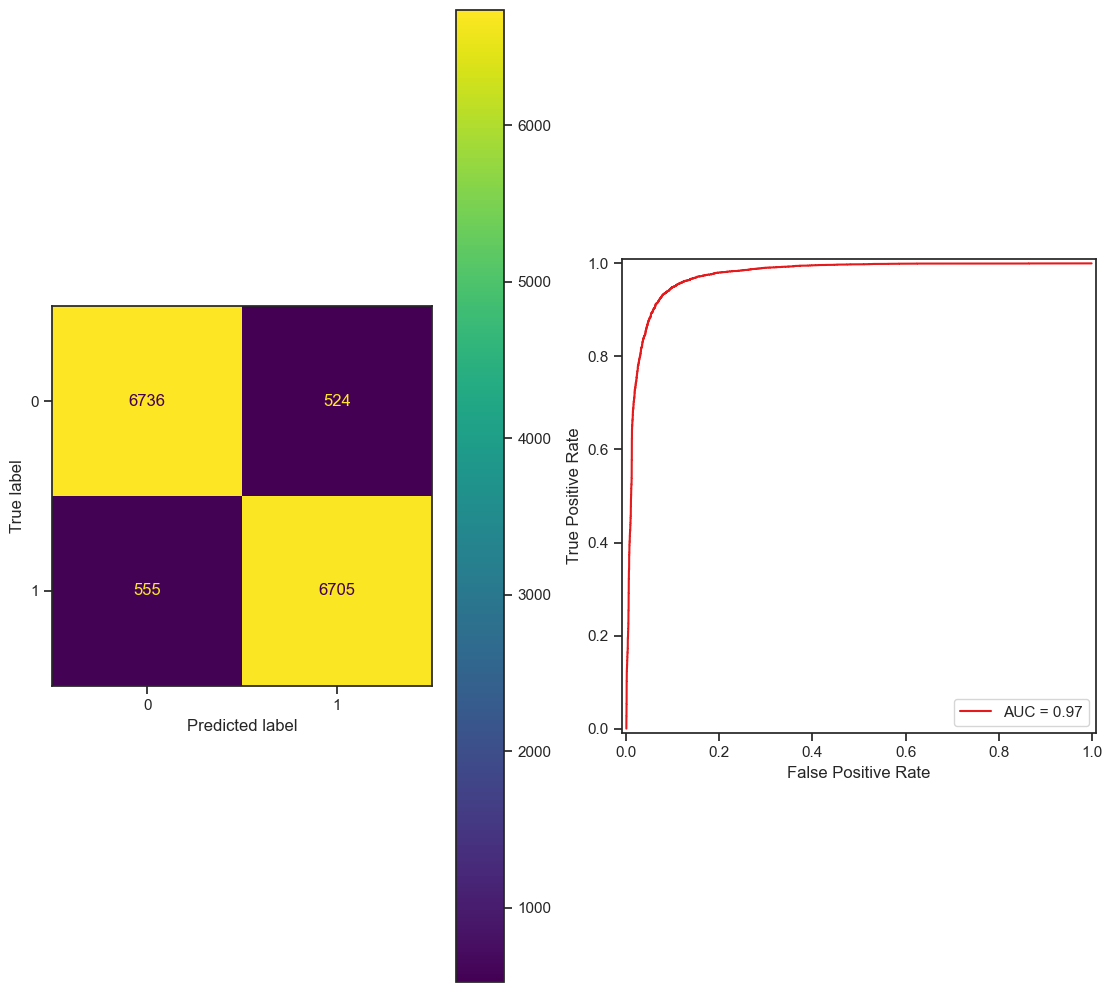

In [49]:
# Rerun the SVM model using optimal hyperparamemetrs
svn_pipe = Pipeline([('scale', StandardScaler()),('svc', SVC(gamma = 0.1, kernel='rbf'))])
svn_pipe.fit(X_bal_train, y_bal_train)
y_bal_pred = svn_pipe.predict(X_bal_test)
print(classification_report(y_bal_test, y_bal_pred))
svc_train_score = accuracy_score(y_bal_train, svn_pipe.predict(X_bal_train))
svc_test_score = accuracy_score(y_bal_test, svn_pipe.predict(X_bal_test))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_bal_test, y_bal_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_bal_score = svn_pipe.decision_function(X_bal_test)
fpr, tpr, thresholds = roc_curve(y_bal_test, y_bal_score, pos_label=1)
svm_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=svm_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(svm_roc_auc_value, 2)

***Best Model:***  SVM model with balanced dataset gives the best performance based on the AUC score (0.97)

In [50]:
#running permutation to identify features with highest impact to classification
from sklearn.inspection import permutation_importance
%matplotlib inline
perm_importance = permutation_importance(svn_pipe, X_bal_test, y_bal_test, n_repeats = 30, max_samples = 100 )

Text(0.5, 0, 'Permutation Importance')

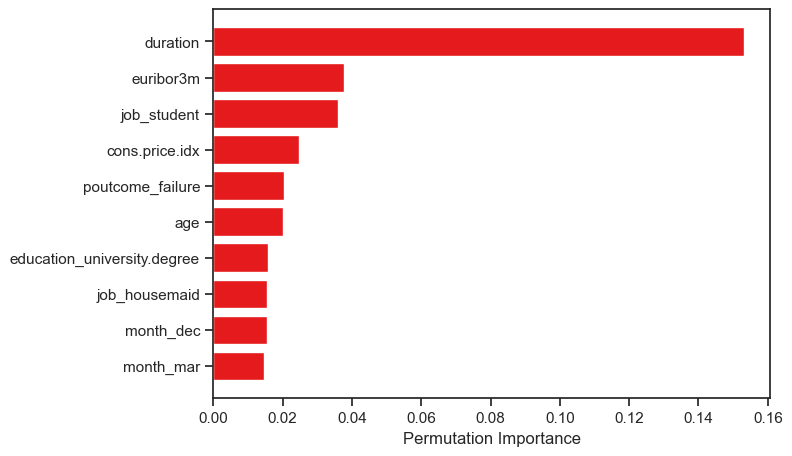

In [51]:
feature_names = X_bal_test.columns
features = np.array(feature_names)
#fig = plt.figure(figsize=(30, 8))
sorted_idx = perm_importance.importances_mean.argsort()
sorted_idx = perm_importance.importances_mean.argsort()[-10:]
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

***Key Takeaways :***

- Call duration is the most relevant feature to predict the outcome of the campaign
- Interest rates are an important macro factor that impacts performance of campaign
- Students and inviduals with university education have a higher propensity for positive outcome from the campaign
- Participants who have been taregtted in previous campigns have a higher likelyhood of succes
- Month of the campaign have an impact on the success of the campaign - December amd March will have highest chance of success


##### Questions

- Duration is a feature which can be known only after the contact with the customer is made. How will removing this feature impact the model performance ?
- Due to computationtional capacity constraints limited the breadth of hyperparamneters that could be tested. Future studies can explore additional optimizations e.g (regularization parameter C for Support vector machines)